<a href="https://colab.research.google.com/github/pedrosena138/if1014-data-mining/blob/main/SMD_Arvore_decisao_visualizacao_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 217 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=6bc67b6ea6d2c52c8277f7e9862a9d86f99f6db82c060c0dbf04fb39fb8b23b1
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  
Acuracia de treinamento da tree1: 0.778
Acuracia de validacao da tree1: 0.736
Acuracia de treinamento da tree2: 1.000
Acuracia de validacao da tree2: 0.688
Profundidade das arvores criadas:
3
13
|--- glucose <= 127.50
|   |--- body-mass <= 26.45
|   |   |--- class: 0.0
|   |--- body-mass >  26.45
|   |   |--- age <= 28.50
|   |   |  

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


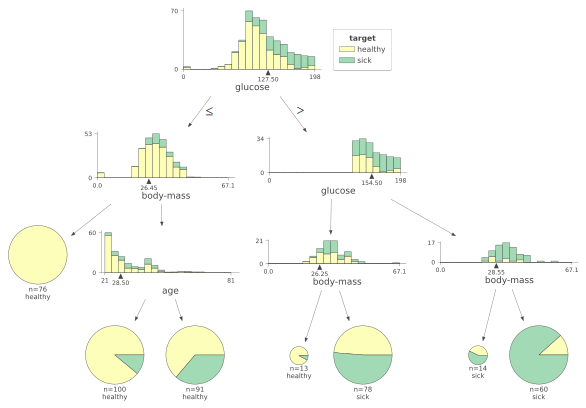

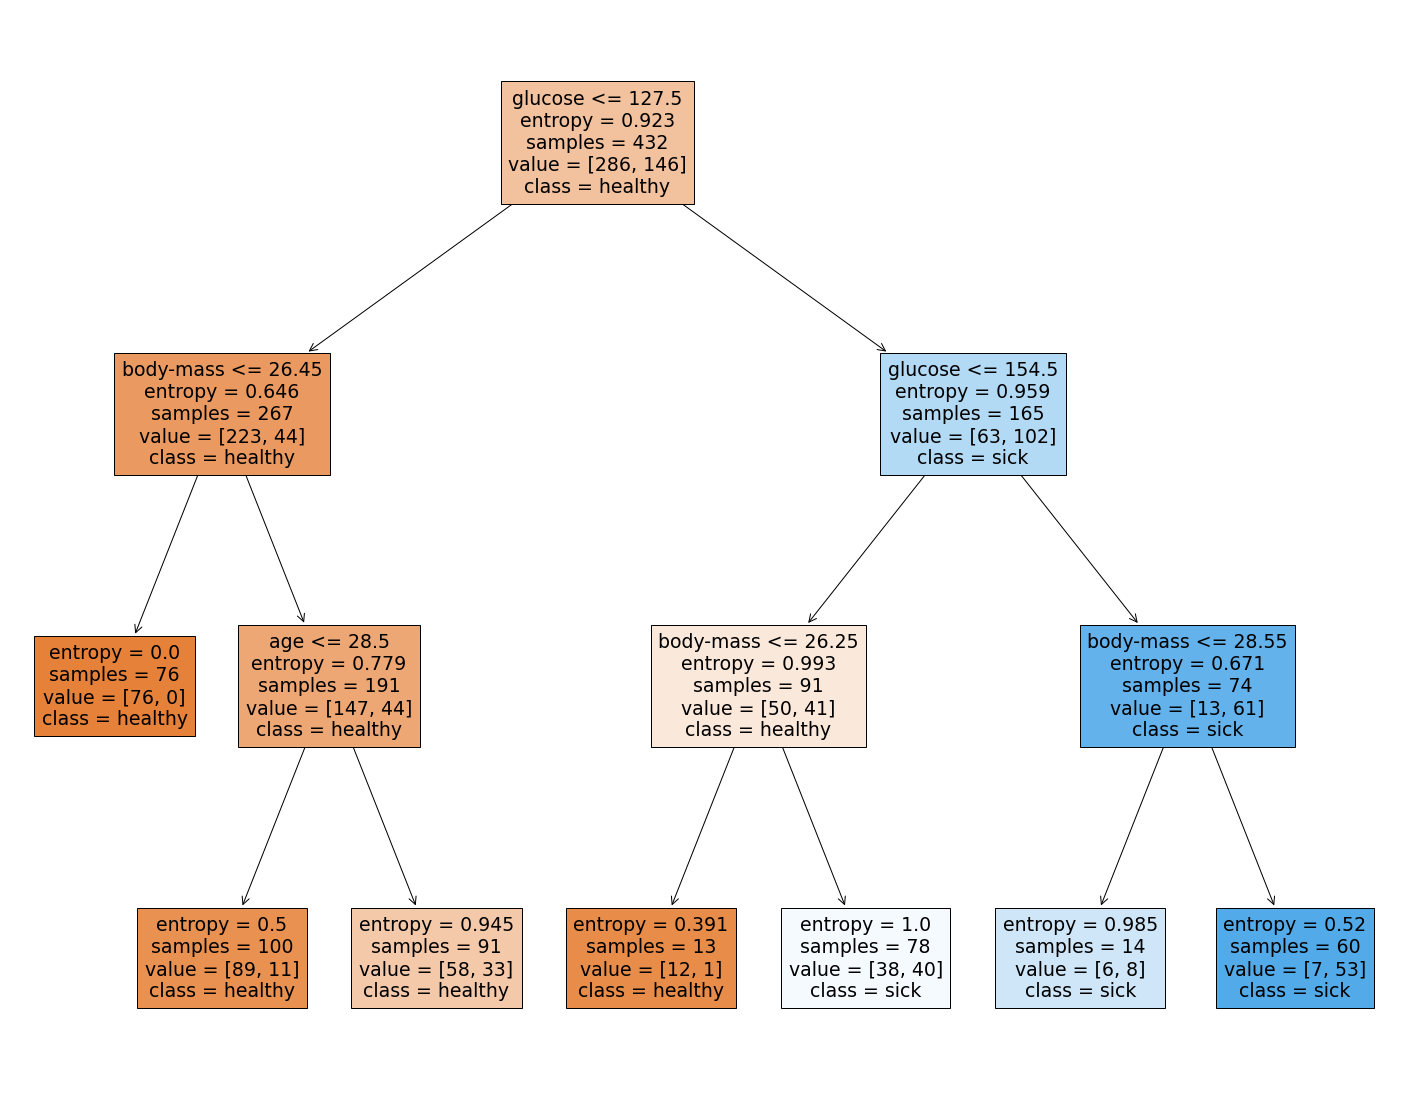

In [ ]:
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
plt.rcParams['figure.figsize'] = [16, 10]

#https://mljar.com/blog/visualize-decision-tree/

#definindo os nomes de cada coluna   
feat_names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=feat_names)

print("Primeiros dados")
print(dataset.head(5))

#Convertendo dados categoricos para dados numericos
# le = LabelEncoder()
# for column_name in dataset.columns:
#     if dataset[column_name].dtype == object:
#         dataset[column_name] = le.fit_transform(dataset[column_name])
#     else:
#         pass

#divisao de dados atributos e classe
X = dataset.values[:, 0:len(dataset.values[0])-1] #caracteristicas
Y = dataset.values[:, len(dataset.values[0])-1] #classe

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

#criando diferentes arvores
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 10)

tree2 = DecisionTreeClassifier(random_state = 10)

tree1 = tree1.fit(X_train, y_train) #treinamento tree1 

tree2 = tree2.fit(X_train, y_train) #treinamento tree2

print("Acuracia de treinamento da tree1: %0.3f" %  tree1.score(X_train, y_train))
print("Acuracia de validacao da tree1: %0.3f" %  tree1.score(X_valid, y_valid))

print("Acuracia de treinamento da tree2: %0.3f" %  tree2.score(X_train, y_train))
print("Acuracia de validacao da tree2: %0.3f" %  tree2.score(X_valid, y_valid))

print("Profundidade das arvores criadas:")
print(tree1.tree_.max_depth)
print(tree2.tree_.max_depth)

#apresentacao da arvore em texto
text_representation = tree.export_text(tree1,feature_names=feat_names[0:len(feat_names)-1])
print(text_representation)

#apresentacao usando o plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree1, 
                   feature_names=feat_names,  
                   class_names=["healthy","sick"],
                   filled=True)
#para salvar a imagem
fig.savefig("decistion_tree.png")

#utilizando o graphiz
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree1, out_file=None, 
                                feature_names=feat_names[0:len(feat_names)-1],  
                                class_names=["healthy","sick"],
                                filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree1, X_train, y_train,
                target_name="target",
                feature_names=feat_names,
                class_names=list(["healthy","sick"]))

viz

In [ ]:
pip install yellowbrick

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import neighbors
   
#definindo os nomes de cada coluna   
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:8]
Y = dataset.values[:,8]

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(7)

clf = clf.fit(X_train, y_train)

print("Acuracia de trainamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))


Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  
Acuracia de trainamento clf: 0.804
Acuracia de teste clf: 0.693


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=3).fit(X)

distances, indices = nbrs.kneighbors(X)
indices 


from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree


clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
array = cross_val_score(clf, iris.data, iris.target, cv=10)

print(array.mean())

dotfile = open("dt-iris.dot", 'w')
tree.export_graphviz(clf, out_file=dotfile, feature_names=iris.feature_names)
dotfile.close()


print("Arvore de decisao gerada no diretorio!")

0.96
Arvore de decisao gerada no diretorio!
